<a href="https://colab.research.google.com/github/gilvandrocesardemedeiros/Meteorology_replace-missing-values/blob/master/Replace_Missing_Values_Temperature%5BPortoAlegre%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importando bibliotecas
import pandas as pd
import numpy as np
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
#Leitura de dados
dataSet = pd.read_csv("https://github.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/raw/master/DadosDiarios/portoalegrediario.csv",
                      sep=';',skiprows=16)

In [0]:
#Transformando data em variável do tipo datetime
dataSet["Data"] = pd.to_datetime(dataSet["Data"], format = "%d/%m/%Y")

In [4]:
#Descrevendo base de dados
dataSet.describe()

,Estacao,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Unnamed: 11
count,24542.0,24542.000000,12266.000000,12242.000000,12243.000000,12131.000000,11600.000000,12227.000000,12223.000000,12269.000000,0.0
mean,83967.0,600.000000,3.959351,25.398268,15.728727,5.888220,2.432095,19.738193,76.451771,2.071611,NaN
std,0.0,600.012224,10.226288,5.637669,4.861767,3.946654,1.541723,4.861474,10.047764,1.293506,NaN
min,83967.0,0.000000,0.000000,8.600000,-0.200000,0.000000,0.000000,5.160000,37.500000,0.000000,NaN
25%,83967.0,0.000000,0.000000,21.300000,12.500000,2.100000,1.300000,16.280000,69.500000,1.200000,NaN
50%,83967.0,600.000000,0.000000,25.800000,16.300000,6.700000,2.200000,20.220000,76.500000,1.866667,NaN
75%,83967.0,1200.000000,1.800000,29.600000,19.600000,9.100000,3.200000,23.560000,83.750000,2.700000,NaN
max,83967.0,1200.000000,149.600000,40.600000,27.900000,13.200000,20.700000,33.700000,99.250000,14.500000,NaN


In [5]:
#Verificando dados
dataSet.head()

,Estacao,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Unnamed: 11
0,83967,1980-01-01,0,NaN,23.0,NaN,9.8,5.5,18.34,65.0,3.800000,NaN
1,83967,1980-01-01,1200,0.0,NaN,14.8,NaN,NaN,NaN,NaN,NaN,NaN
2,83967,1980-01-02,0,NaN,24.1,NaN,10.8,4.8,18.90,69.5,2.200000,NaN
3,83967,1980-01-02,1200,0.0,NaN,13.8,NaN,NaN,NaN,NaN,NaN,NaN
4,83967,1980-01-03,0,NaN,28.4,NaN,11.7,5.0,21.24,59.0,2.166667,NaN


In [0]:
#Atribuindo "Data" como índice para a base de dados
dataSet = dataSet.set_index("Data")

In [0]:
#Separando os dados em dois dataframes, um para as 00:00 h e outro para as 12:00 h
dataSet00, dataSet12 = dataSet[dataSet["Hora"] == 0], dataSet[dataSet["Hora"] == 1200]

In [0]:
#Descartando as colunas "Hora", "Estacao" e "Unnamed: 11" 
dataSet00, dataSet12 = dataSet00.drop(columns = ["Hora", "Estacao", "Unnamed: 11"]), dataSet12.drop(columns = ["Hora", "Estacao", "Unnamed: 11"])

In [9]:
#Verificando dataframe para os dados disponibilizados às 00:00 h
dataSet00.describe()

,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
count,0.0,12242.000000,0.0,12131.000000,11600.000000,12227.000000,12223.000000,12269.000000
mean,NaN,25.398268,NaN,5.888220,2.432095,19.738193,76.451771,2.071611
std,NaN,5.637669,NaN,3.946654,1.541723,4.861474,10.047764,1.293506
min,NaN,8.600000,NaN,0.000000,0.000000,5.160000,37.500000,0.000000
25%,NaN,21.300000,NaN,2.100000,1.300000,16.280000,69.500000,1.200000
50%,NaN,25.800000,NaN,6.700000,2.200000,20.220000,76.500000,1.866667
75%,NaN,29.600000,NaN,9.100000,3.200000,23.560000,83.750000,2.700000
max,NaN,40.600000,NaN,13.200000,20.700000,33.700000,99.250000,14.500000


In [10]:
#Verificando dataframe para os dados disponibilizados às 12:00 h
dataSet12.describe()

,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
count,12266.000000,0.0,12243.000000,0.0,0.0,0.0,0.0,0.0
mean,3.959351,NaN,15.728727,NaN,NaN,NaN,NaN,NaN
std,10.226288,NaN,4.861767,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,-0.200000,NaN,NaN,NaN,NaN,NaN
25%,0.000000,NaN,12.500000,NaN,NaN,NaN,NaN,NaN
50%,0.000000,NaN,16.300000,NaN,NaN,NaN,NaN,NaN
75%,1.800000,NaN,19.600000,NaN,NaN,NaN,NaN,NaN
max,149.600000,NaN,27.900000,NaN,NaN,NaN,NaN,NaN


In [0]:
#Eliminando colunas completas por "NaN" em cada uma das bases de dados
dataSet00 = dataSet00.drop(columns = ["Precipitacao","TempMinima"])
dataSet12 = dataSet12.drop(columns = ["TempMaxima","Insolacao","Evaporacao Piche","Temp Comp Media","Umidade Relativa Media","Velocidade do Vento Media"])

In [12]:
#Exibindo a base de dados recém filtrada para 00:00 h
dataSet00.head()

,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
Data,,,,,,
1980-01-01,23.0,9.8,5.5,18.34,65.00,3.800000
1980-01-02,24.1,10.8,4.8,18.90,69.50,2.200000
1980-01-03,28.4,11.7,5.0,21.24,59.00,2.166667
1980-01-04,28.0,11.1,7.7,22.22,63.75,3.333333
1980-01-05,28.9,11.3,10.3,23.34,69.00,3.766667


In [13]:
#Exibindo a base de dados recém filtrada para 12:00 h
dataSet12.head()

,Precipitacao,TempMinima
Data,,
1980-01-01,0.0,14.8
1980-01-02,0.0,13.8
1980-01-03,0.0,14.5
1980-01-04,0.0,15.9
1980-01-05,0.0,19.5


In [0]:
#Criando o intervalo completo de tempo de 01-01-1980 à 31-12-2017
dataInicial = '1980-01-01'
dataFinal = '2017-12-31'
tempo = pd.date_range(dataInicial, dataFinal)
#Atribuindo este intervalo de tempo à um dataSet provisório
dataSetProv = pd.DataFrame()
dataSetProv["Data"] = tempo

In [0]:
#Atribuindo o índice para o dataSet provisório como sendo a coluna de datas
dataSetProv = dataSetProv.set_index("Data")

In [16]:
#Visualizando o dataSet provisório
dataSetProv.head()

""
Data
1980-01-01
1980-01-02
1980-01-03
1980-01-04
1980-01-05


In [0]:
#Mesclando o dataSet provisório como sendo o resultado da junção dos dataSet00 e dataSet12
dataSetProv = dataSetProv.join(dataSet00).join(dataSet12)

In [18]:
#Mostrando o resultado da junção
dataSetProv.head()

,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao,TempMinima
Data,,,,,,,,
1980-01-01,23.0,9.8,5.5,18.34,65.00,3.800000,0.0,14.8
1980-01-02,24.1,10.8,4.8,18.90,69.50,2.200000,0.0,13.8
1980-01-03,28.4,11.7,5.0,21.24,59.00,2.166667,0.0,14.5
1980-01-04,28.0,11.1,7.7,22.22,63.75,3.333333,0.0,15.9
1980-01-05,28.9,11.3,10.3,23.34,69.00,3.766667,0.0,19.5


In [19]:
#Quantidade de dias existentes na base de dados
len(dataSetProv)

13880

In [0]:
#Tornando o dataSet como sendo o dataSet provisório
dataSet = dataSetProv

In [21]:
#Descrevendo o novo dataSet
dataSet.describe()

,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao,TempMinima
count,12242.000000,12131.000000,11600.000000,12227.000000,12223.000000,12269.000000,12266.000000,12243.000000
mean,25.398268,5.888220,2.432095,19.738193,76.451771,2.071611,3.959351,15.728727
std,5.637669,3.946654,1.541723,4.861474,10.047764,1.293506,10.226288,4.861767
min,8.600000,0.000000,0.000000,5.160000,37.500000,0.000000,0.000000,-0.200000
25%,21.300000,2.100000,1.300000,16.280000,69.500000,1.200000,0.000000,12.500000
50%,25.800000,6.700000,2.200000,20.220000,76.500000,1.866667,0.000000,16.300000
75%,29.600000,9.100000,3.200000,23.560000,83.750000,2.700000,1.800000,19.600000
max,40.600000,13.200000,20.700000,33.700000,99.250000,14.500000,149.600000,27.900000


In [22]:
#Mostrando o cabeçalho do novo dataSet
dataSet.head()

,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao,TempMinima
Data,,,,,,,,
1980-01-01,23.0,9.8,5.5,18.34,65.00,3.800000,0.0,14.8
1980-01-02,24.1,10.8,4.8,18.90,69.50,2.200000,0.0,13.8
1980-01-03,28.4,11.7,5.0,21.24,59.00,2.166667,0.0,14.5
1980-01-04,28.0,11.1,7.7,22.22,63.75,3.333333,0.0,15.9
1980-01-05,28.9,11.3,10.3,23.34,69.00,3.766667,0.0,19.5


# Modelagem para previsão de Temperatura Máxima

In [0]:
#Separando base de dados para treino de rede neural para previsão de temperatura máxima
dataTreinoTempMax = dataSet.dropna(subset = ["TempMaxima"])

In [0]:
#Separando a variável que será prevista, TempMaxima, da base de dados
tempMax = dataTreinoTempMax["TempMaxima"]
dataTreinoTempMax = dataTreinoTempMax.drop(columns = "TempMaxima")

In [25]:
#Visualizando cabeçalho dos dados para treino
dataTreinoTempMax.head()

,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao,TempMinima
Data,,,,,,,
1980-01-01,9.8,5.5,18.34,65.00,3.800000,0.0,14.8
1980-01-02,10.8,4.8,18.90,69.50,2.200000,0.0,13.8
1980-01-03,11.7,5.0,21.24,59.00,2.166667,0.0,14.5
1980-01-04,11.1,7.7,22.22,63.75,3.333333,0.0,15.9
1980-01-05,11.3,10.3,23.34,69.00,3.766667,0.0,19.5


In [26]:
#Visualizando cabeçalho das informações de temperatura 
tempMax.head()

Data
1980-01-01    23.0
1980-01-02    24.1
1980-01-03    28.4
1980-01-04    28.0
1980-01-05    28.9
Name: TempMaxima, dtype: float64

In [0]:
#Guardando a informação de como as colunas estão distribuídas no dataFrame
colunas = dataTreinoTempMax.columns

In [0]:
#Efetuando uma transformação que lineariza todas as informações para cada coluna entre -1 e 1
mms = MinMaxScaler(feature_range=(-1, 1))
dataTreinoTempMax = mms.fit_transform(dataTreinoTempMax)

In [29]:
#Visualizando como está a base de dados para treino após a linearização
prov = pd.DataFrame(dataTreinoTempMax)
prov.columns = colunas
prov.describe()

,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao,TempMinima
count,12127.000000,11597.000000,12219.000000,12213.000000,12240.000000,12225.000000,12220.000000
mean,-0.107794,-0.765001,0.021577,0.261512,-0.714301,-0.947086,0.133563
std,0.598000,0.148972,0.340702,0.325392,0.178367,0.136599,0.346164
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.681818,-0.874396,-0.220743,0.036437,-0.834483,-1.000000,-0.096085
50%,0.015152,-0.787440,0.055361,0.263158,-0.742529,-1.000000,0.174377
75%,0.378788,-0.690821,0.289418,0.497976,-0.627586,-0.975936,0.409253
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
#Trocando dados faltantes por 0 
dataTreinoTempMax = np.nan_to_num(dataTreinoTempMax, copy = False)

In [31]:
#Verificando dimensões do dataSet
print(dataTreinoTempMax.shape)

(12242, 7)


In [0]:
#Separando conjunto de treino e teste para previsão de temperatura máxima (90% para treino e 10% para teste)
X_trainTempMax, X_testTempMax, Y_trainTempMax, Y_testTempMax = train_test_split(dataTreinoTempMax, tempMax, test_size = 0.1, random_state = 9)

In [0]:
#Definindo uma função para criar a MLP
def trainMLP(optimizer='adam', init='random_uniform', units = 7, camadas = 2):    
  #Criando o modelo
  mlp = Sequential()
  #Adicionando a camada de entrada
  mlp.add(Dense(activation = 'tanh', input_dim = units, units = units, kernel_initializer = init, bias_initializer='zeros'))
  #Adicionando as camadas escondidas
  for i in range(camadas):
    mlp.add(Dense(activation = 'tanh', units = units, kernel_initializer = init, bias_initializer='zeros'))
  #Adicionando a camada de saída
  mlp.add(Dense(units = 1, kernel_initializer = init, bias_initializer='zeros'))    
  # Compilando o modelo
  mlp.compile(loss='mean_squared_error', optimizer = optimizer, metrics= ['mae'])
  return mlp

In [0]:
#Modelo de classificação do Keras
estimator = KerasRegressor(build_fn=trainMLP, epochs = 200, verbose = 2)

In [0]:
#Criando o objeto para Cross Validation
kfold = KFold(n_splits=4, shuffle=True, random_state=5)

In [0]:
#Parâmetros para o Grid Search
parameters = {'batch_size': [10],             
              'camadas': [2],
              'units': [7]}

In [0]:
#Modelagem para buscar os melhores parâmetros
grid_searchTempMax = GridSearchCV(estimator = estimator, param_grid = parameters,
                     scoring = "neg_mean_squared_error", verbose=500, cv = kfold, return_train_score = True)

In [38]:
#Busca pelos melhores parâmetros
grid_resultTempMax = grid_searchTempMax.fit(X_trainTempMax, Y_trainTempMax)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] batch_size=10, camadas=2, units=7 ...............................
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
 - 1s - loss: 486.0676 - mean_absolute_error: 21.2033
Epoch 2/200
 - 1s - loss: 254.4002 - mean_absolute_error: 14.8478
Epoch 3/200
 - 1s - loss: 130.3701 - mean_absolute_error: 10.0348
Epoch 4/200
 - 1s - loss: 66.6992 - mean_absolute_error: 6.8472
Epoch 5/200
 - 1s - loss: 40.4002 - mean_absolute_error: 5.2941
Epoch 6/200
 - 1s - loss: 32.9111 - mean_absolute_error: 4.7711
Epoch 7/200
 - 1s - loss: 31.7416 - mean_absolute_error: 4.6641
Epoch 8/200
 - 1s - loss: 25.2628 - mean_absolute_error: 4.0484
Epoch 9/200
 - 1s - loss: 9.6920 - mean_absolute_error: 2.3978
Epoch 10/200
 - 1s - loss: 4.5257 - mean_absolute_error: 1.5850
Epoch 11/200
 - 1s - los

In [39]:
#Exibição dos melhores resultados
print("Melhor resultado: %f, usando %s" % (grid_resultTempMax.best_score_, grid_resultTempMax.best_params_))
means = grid_resultTempMax.cv_results_['mean_test_score']
stds = grid_resultTempMax.cv_results_['std_test_score']
params = grid_resultTempMax.cv_results_['params']
print("Resultados (Desvio padrão) {Parâmetros}")
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) %r" % (mean, stdev, param))

Melhor resultado: -1.347112, usando {'batch_size': 10, 'camadas': 2, 'units': 7}
Resultados (Desvio padrão) {Parâmetros}
-1.347112 (0.034983) {'batch_size': 10, 'camadas': 2, 'units': 7}


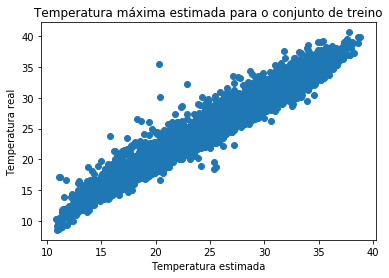

In [40]:
#Gráfico de previsão para o conjunto de treino
plt.scatter(grid_searchTempMax.predict(X_trainTempMax), Y_trainTempMax)
plt.title("Temperatura máxima estimada para o conjunto de treino")
plt.xlabel("Temperatura estimada")
plt.ylabel("Temperatura real")
plt.show()

In [41]:
#Mostrando uma matriz de correlação das variáveis de treino com a melhor modelagem
print(np.corrcoef(grid_searchTempMax.predict(X_trainTempMax), Y_trainTempMax))

[[1.         0.97952568]
 [0.97952568 1.        ]]


In [0]:
#Previsão com base no resultado da Grid Search
Y_predTempMax = grid_searchTempMax.predict(X_testTempMax)

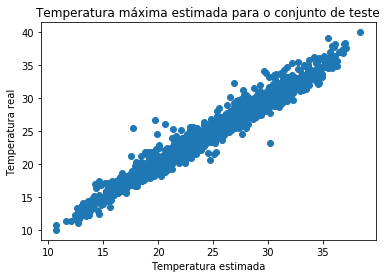

In [43]:
#Gráfico que mostra a relação entre a temperatura máxima real e a prevista para o conjunto de teste
plt.scatter(Y_predTempMax, Y_testTempMax)
plt.title("Temperatura máxima estimada para o conjunto de teste")
plt.xlabel("Temperatura estimada")
plt.ylabel("Temperatura real")
plt.show()

In [44]:
#Mostrando uma matriz de correlação das variáveis de teste com a melhor modelagem
print(np.corrcoef(Y_predTempMax, Y_testTempMax))

[[1.         0.97883653]
 [0.97883653 1.        ]]


In [45]:
#Erro absoluto médio entre a temperatura máxima prevista e a real
print(mean_absolute_error(Y_testTempMax, Y_predTempMax))

0.867741573722995


In [46]:
#Erro quadrático médio entre a temperatura máxima prevista e a real
print(mean_squared_error(Y_testTempMax, Y_predTempMax))

1.373220810416804


# Modelagem para previsão de Temperatura Mínima

In [0]:
#Separando dados para treinar rede neural para previsão de temperatura mínima
dataTreinoTempMin = dataSet.dropna(subset = ["TempMinima"])

In [0]:
#Separando a variável que será prevista, TempMinima, da base de dados
tempMin = dataTreinoTempMin["TempMinima"]
dataTreinoTempMin = dataTreinoTempMin.drop(columns = "TempMinima")

In [49]:
#Visualizando dados de treino para temperatura mínima
dataTreinoTempMin.head()

,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao
Data,,,,,,,
1980-01-01,23.0,9.8,5.5,18.34,65.00,3.800000,0.0
1980-01-02,24.1,10.8,4.8,18.90,69.50,2.200000,0.0
1980-01-03,28.4,11.7,5.0,21.24,59.00,2.166667,0.0
1980-01-04,28.0,11.1,7.7,22.22,63.75,3.333333,0.0
1980-01-05,28.9,11.3,10.3,23.34,69.00,3.766667,0.0


In [50]:
#Visualizando informações de temperatura mínima para cada um dos dados de treino 
tempMin.head()

Data
1980-01-01    14.8
1980-01-02    13.8
1980-01-03    14.5
1980-01-04    15.9
1980-01-05    19.5
Name: TempMinima, dtype: float64

In [0]:
#Guardando informação de como as colunas estão distribuídas no dataFrame 
colunas = dataTreinoTempMin.columns

In [0]:
#Efetuando uma transformação que lineariza todas as informações para cada coluna entre -1 e 1
mms = MinMaxScaler(feature_range=(-1, 1))
dataTreinoTempMin = mms.fit_transform(dataTreinoTempMin)

In [53]:
#Visualizando como está a base de dados para treino após a linearização
prov = pd.DataFrame(dataTreinoTempMin)
prov.columns = colunas
prov.describe()

,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao
count,12220.000000,12123.000000,11595.000000,12216.000000,12212.000000,12242.000000,12238.000000
mean,0.050023,-0.107857,-0.765041,0.021630,0.261776,-0.714277,-0.946946
std,0.352449,0.598020,0.148942,0.340579,0.325351,0.178406,0.136848
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.206250,-0.681818,-0.874396,-0.220743,0.036437,-0.834483,-1.000000
50%,0.075000,0.015152,-0.787440,0.055361,0.263158,-0.742529,-1.000000
75%,0.312500,0.378788,-0.690821,0.289418,0.497976,-0.627586,-0.975936
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
#Trocando dados faltantes por 0
dataTreinoTempMin = np.nan_to_num(dataTreinoTempMin, copy = False)

In [55]:
#Verificando dimensões do dataSet
print(dataTreinoTempMin.shape)

(12243, 7)


In [0]:
#Separando conjunto de treino e teste para previsão de temperatura máxima (90% para treino e 10% para teste)
X_trainTempMin, X_testTempMin, Y_trainTempMin, Y_testTempMin = train_test_split(dataTreinoTempMin, tempMin, test_size = 0.1, random_state = 9)

In [0]:
#Modelo de classificação do Keras
estimator = KerasRegressor(build_fn=trainMLP, epochs = 200, verbose = 2)

In [0]:
#Criando o objeto para Cross Validation
kfold = KFold(n_splits=4, shuffle=True, random_state=5)

In [0]:
#Parâmetros para o Grid Search
parameters = {'batch_size': [10],             
              'camadas': [2],
              'units': [7]}

In [0]:
#Modelagem para buscar os melhores parâmetros
grid_searchTempMin = GridSearchCV(estimator = estimator, param_grid = parameters,
                     scoring = "neg_mean_squared_error", verbose=500, cv = kfold, return_train_score = True)

In [61]:
#Busca pelos melhores parâmetros
grid_resultTempMin = grid_searchTempMin.fit(X_trainTempMin, Y_trainTempMin)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] batch_size=10, camadas=2, units=7 ...............................
Epoch 1/200
 - 1s - loss: 164.3801 - mean_absolute_error: 11.7234
Epoch 2/200
 - 1s - loss: 61.5933 - mean_absolute_error: 6.7813
Epoch 3/200
 - 1s - loss: 30.5716 - mean_absolute_error: 4.6600
Epoch 4/200
 - 1s - loss: 22.0870 - mean_absolute_error: 3.8708
Epoch 5/200
 - 1s - loss: 8.8286 - mean_absolute_error: 2.3610
Epoch 6/200
 - 1s - loss: 4.1467 - mean_absolute_error: 1.5996
Epoch 7/200
 - 1s - loss: 2.5655 - mean_absolute_error: 1.2519
Epoch 8/200
 - 1s - loss: 1.9857 - mean_absolute_error: 1.0947
Epoch 9/200
 - 1s - loss: 1.7755 - mean_absolute_error: 1.0306
Epoch 10/200
 - 1s - loss: 1.6480 - mean_absolute_error: 0.9947
Epoch 11/200
 - 1s - loss: 1.5962 - mean_absolute_error: 0.9734
Epoch 12/200
 - 1s - loss: 1.5235 - mean_absolute_error: 0.9505
Epoch 13/200
 - 1s - los

In [62]:
#Exibição dos melhores resultados
print("Melhor resultado: %f, usando %s" % (grid_resultTempMin.best_score_, grid_resultTempMin.best_params_))
means = grid_resultTempMin.cv_results_['mean_test_score']
stds = grid_resultTempMin.cv_results_['std_test_score']
params = grid_resultTempMin.cv_results_['params']
print("Resultados (Desvio padrão) {Parâmetros}")
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) %r" % (mean, stdev, param))

Melhor resultado: -1.118660, usando {'batch_size': 10, 'camadas': 2, 'units': 7}
Resultados (Desvio padrão) {Parâmetros}
-1.118660 (0.060827) {'batch_size': 10, 'camadas': 2, 'units': 7}


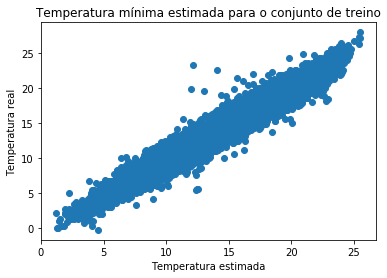

In [63]:
#Gráfico de previsão para o conjunto de treino
plt.scatter(grid_searchTempMin.predict(X_trainTempMin), Y_trainTempMin)
plt.title("Temperatura mínima estimada para o conjunto de treino")
plt.xlabel("Temperatura estimada")
plt.ylabel("Temperatura real")
plt.show()

In [64]:
#Mostrando uma matriz de correlação das variáveis de treino com a melhor modelagem
print(np.corrcoef(grid_searchTempMin.predict(X_trainTempMin), Y_trainTempMin))

[[1.         0.97731344]
 [0.97731344 1.        ]]


In [0]:
#Previsão para os dados de teste a partir da modelagem obtida
Y_predTempMin = grid_searchTempMin.predict(X_testTempMin)

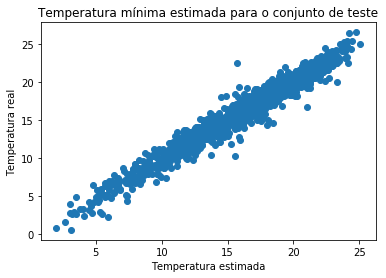

In [66]:
#Gráfico que mostra a relação entre a temperatura mínima real e a temperatura mínima prevista para os dados de teste
plt.scatter(Y_predTempMin, Y_testTempMin)
plt.title("Temperatura mínima estimada para o conjunto de teste")
plt.xlabel("Temperatura estimada")
plt.ylabel("Temperatura real")
plt.show()

In [67]:
#Mostrando uma matriz de correlação das variáveis de teste com a melhor modelagem
print(np.corrcoef(Y_predTempMin, Y_testTempMin))

[[1.         0.97732564]
 [0.97732564 1.        ]]


In [68]:
#Erro absoluto médio entre temperatura mínima real e prevista para os dados de teste
print(mean_absolute_error(Y_testTempMin, Y_predTempMin))

0.7896287443783819


In [69]:
#Erro quadrático médio entre a temperatura mínima real e a prevista para os dados de teste
print(mean_squared_error(Y_testTempMin, Y_predTempMin))

1.06177170350497


In [70]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pickle
# Salvando os modelos treinados
filename = '/content/gdrive/My Drive/TemperaturaMaximaPortoAlegre.sav'
pickle.dump(grid_searchTempMax, open(filename, 'wb'))

In [0]:
filename = '/content/gdrive/My Drive/TemperaturaMinimaPortoAlegre.sav'
pickle.dump(grid_searchTempMin, open(filename, 'wb'))